# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

| Field                            | Description                                                  |
|----------------------------------|--------------------------------------------------------------|
| Interview Id                     | Id for the interview                                        |
| Candidate Id                     | Id for the candidate                                        |
| Interviewer Id                   | Id for the interviewer                                      |
| Profile                          | Profile type                                                |
| S.L.R.C (Speak to Listen Ratio Candidate) | Ratio of speaking time to listening time of the Candidate |
| S.L.R.I (Speak to Listen Ratio Interviewer) | Ratio of speaking time to listening time of the Interviewer |
| A.T.T Avg Turn Time (Interactivity Time) | Average time for a single interaction between Interviewer and Candidate |
| L.M.I (Longest Monologue Interviewer) | Longest time the interviewer spoke continuously |
| L.M.C (Longest Monologue Candidate) | Longest time the candidate spoke continuously |
| S.R (SILENCE RATIO)              | Percentage of time when no one spoke                       |
| L.J.T.C (Late Joining Time Candidate) | Amount of time candidate joined late for the interview call |
| L.J.T.I (Late Joining Time Interviewer) | Amount of time the interviewer joined late for the interview call |
| N.I.C (Noise Index Candidate)     | Percentage of Background Noise on the candidate side       |
| N.I.I (Noise Index Interviewer)   | Percentage of Background Noise on the interviewer side     |
| S.P.I (Speaking Pace interviewer) | Average words spoken per minute by the interviewer          |
| S.P.C (Speaking Pace Candidate)   | Average words spoken per minute by the candidate            |
| L.A.I (Live Absence interviewer)  | Percentage of time the interviewer was not present in the video call |
| L.A.C (Live Absence candidate)    | Percentage of time the candidate was not present in the video call |
| Q.A (Question asked during the interview) | Number of questions asked during the interview      |
| P.E.I (Perceived Emotion Interviewer) | Perceived emotion of the interviewer (Positive or Negative) |
| P.E.C (Perceived Emotion Candidate) | Perceived emotion of the candidate (Positive or Negative) |
| Compliance ratio                 | Ratio of assigned questions to questions actually asked  |
| Interview Duration               | Duration of the interview in minutes                       |
| Interview Intro                  | Whether the interviewer gave a self-introduction to the candidate |
| Candidate Intro                  | Whether the candidate gave a self-introduction to the interviewer |
| Opp to ask                       | Whether the interviewer provided an opportunity for the candidate to ask questions at the end |
| Status                           | Status of the candidate                                      |


In [3]:
# Reading the dataset
train_df = pd.read_csv('train_IA_-_train.csv')
train_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [4]:
train_df.shape

(5800, 27)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [6]:
# Checking Duplicate Rows
train_df.duplicated().sum()

0

## Checking Null Values

In [7]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
Status               4
dtype: int64

In [8]:
# Dropping the records for which the output column "Status" has null values
train_df = train_df[train_df['Status'].notnull()]

In [9]:
# Checking Null Values again
train_df.isnull().sum()[train_df.isnull().sum() > 0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
dtype: int64

## Checking unique values in 'Id' columns.

In [10]:
# Checking unique values in 'Interview Id', 'Candidate Id' and 'Interviewer Id'
print(f"Number of Unique values in 'Interview Id' column: {train_df['Interview Id'].nunique()}")
print(f"Number of Unique values in 'Candidate Id' column: {train_df['Candidate Id'].nunique()}")
print(f"Number of Unique values in 'Interviewer Id' column: {train_df['Interviewer Id'].nunique()}")

Number of Unique values in 'Interview Id' column: 5796
Number of Unique values in 'Candidate Id' column: 5796
Number of Unique values in 'Interviewer Id' column: 79


Since all the values in 'Interview Id' and 'Candidate Id' are unique, these fail to provide any meaningful information info. we can drop these two columns.

In [11]:
train_df.drop(columns = ['Interview Id', 'Candidate Id'], inplace=True)

#### Observations:
- The dataset contains various interview-related metrics and information, with "Status" serving as the output column indicating the status of the candidates.
- There were no duplicate records.
- There were 4 null values in the output column 'status', which have been dropped.
- There are some null values in 4 other columns. These shall be dealt with later.
- Since all the values in 'Interview Id' and 'Candidate Id' we unique, they failed to provide any relevant information and were dropped.

# Exploratory Data Analysis

## Separating Categorical and Numerical Features

In [12]:
train_df.head(2)

,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider


In [13]:
cat_col = [col for col in train_df.columns if train_df[col].dtypes=='object']
num_col = [col for col in train_df.columns if train_df[col].dtypes!='object']

# Removing 'Status' from cat_col list since it is the target variable
cat_col.remove('Status')

print(f"Categorical Features: {cat_col}")
print(f"Numerical Features: {num_col}")

Categorical Features: ['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']
Numerical Features: ['Interviewer Id', 'S.L.R.C', 'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio', 'Interview duration']


## Analyzing Categorical Features

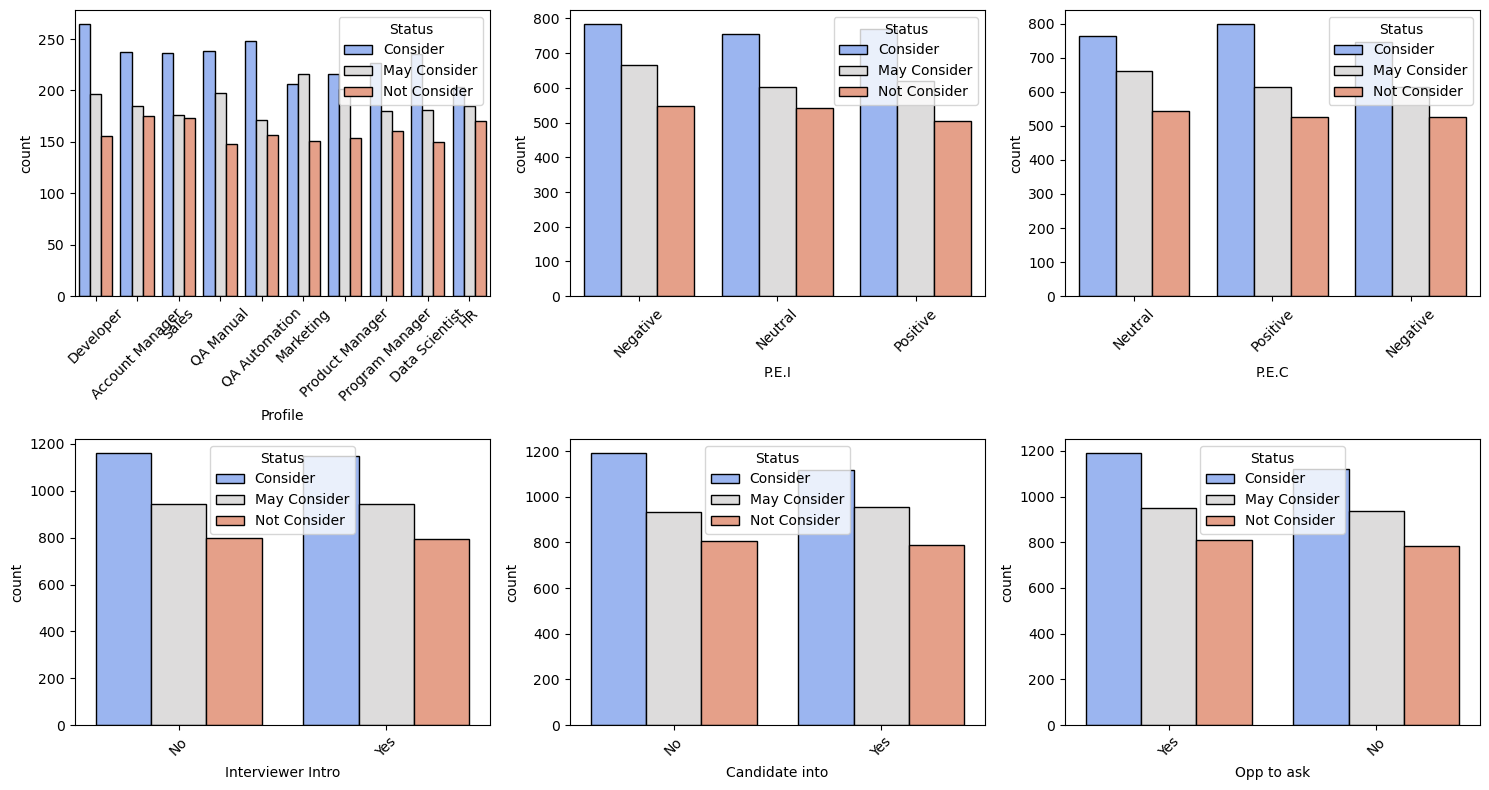

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axs = axs.flatten()

for i,j in enumerate(cat_col):
    sns.countplot(data=train_df, x=j, ax=axs[i], order = train_df[cat_col[i]].value_counts().index, hue='Status', 
                  palette = "coolwarm", edgecolor = "black")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Observations:
- Almost similar number of interviews were held for all the different profiles, with number of interviews held for 'devoloper' profile being slightly higher than the rest of the profiles.
- Percieved emotion of interviewer and candidate does not seem to affect the Status of candidate as much, since their distributions are almost similar for all the emotions.
- Interviewer Intro also does not affect the status of the candidate as much since the frequency distributions are almost similar as well
- Candidate Intro might affect the status of the candidate as we can see that candidates who give an introduction have somewhat higher chances to be considered.

## Analyzing Numerical Features

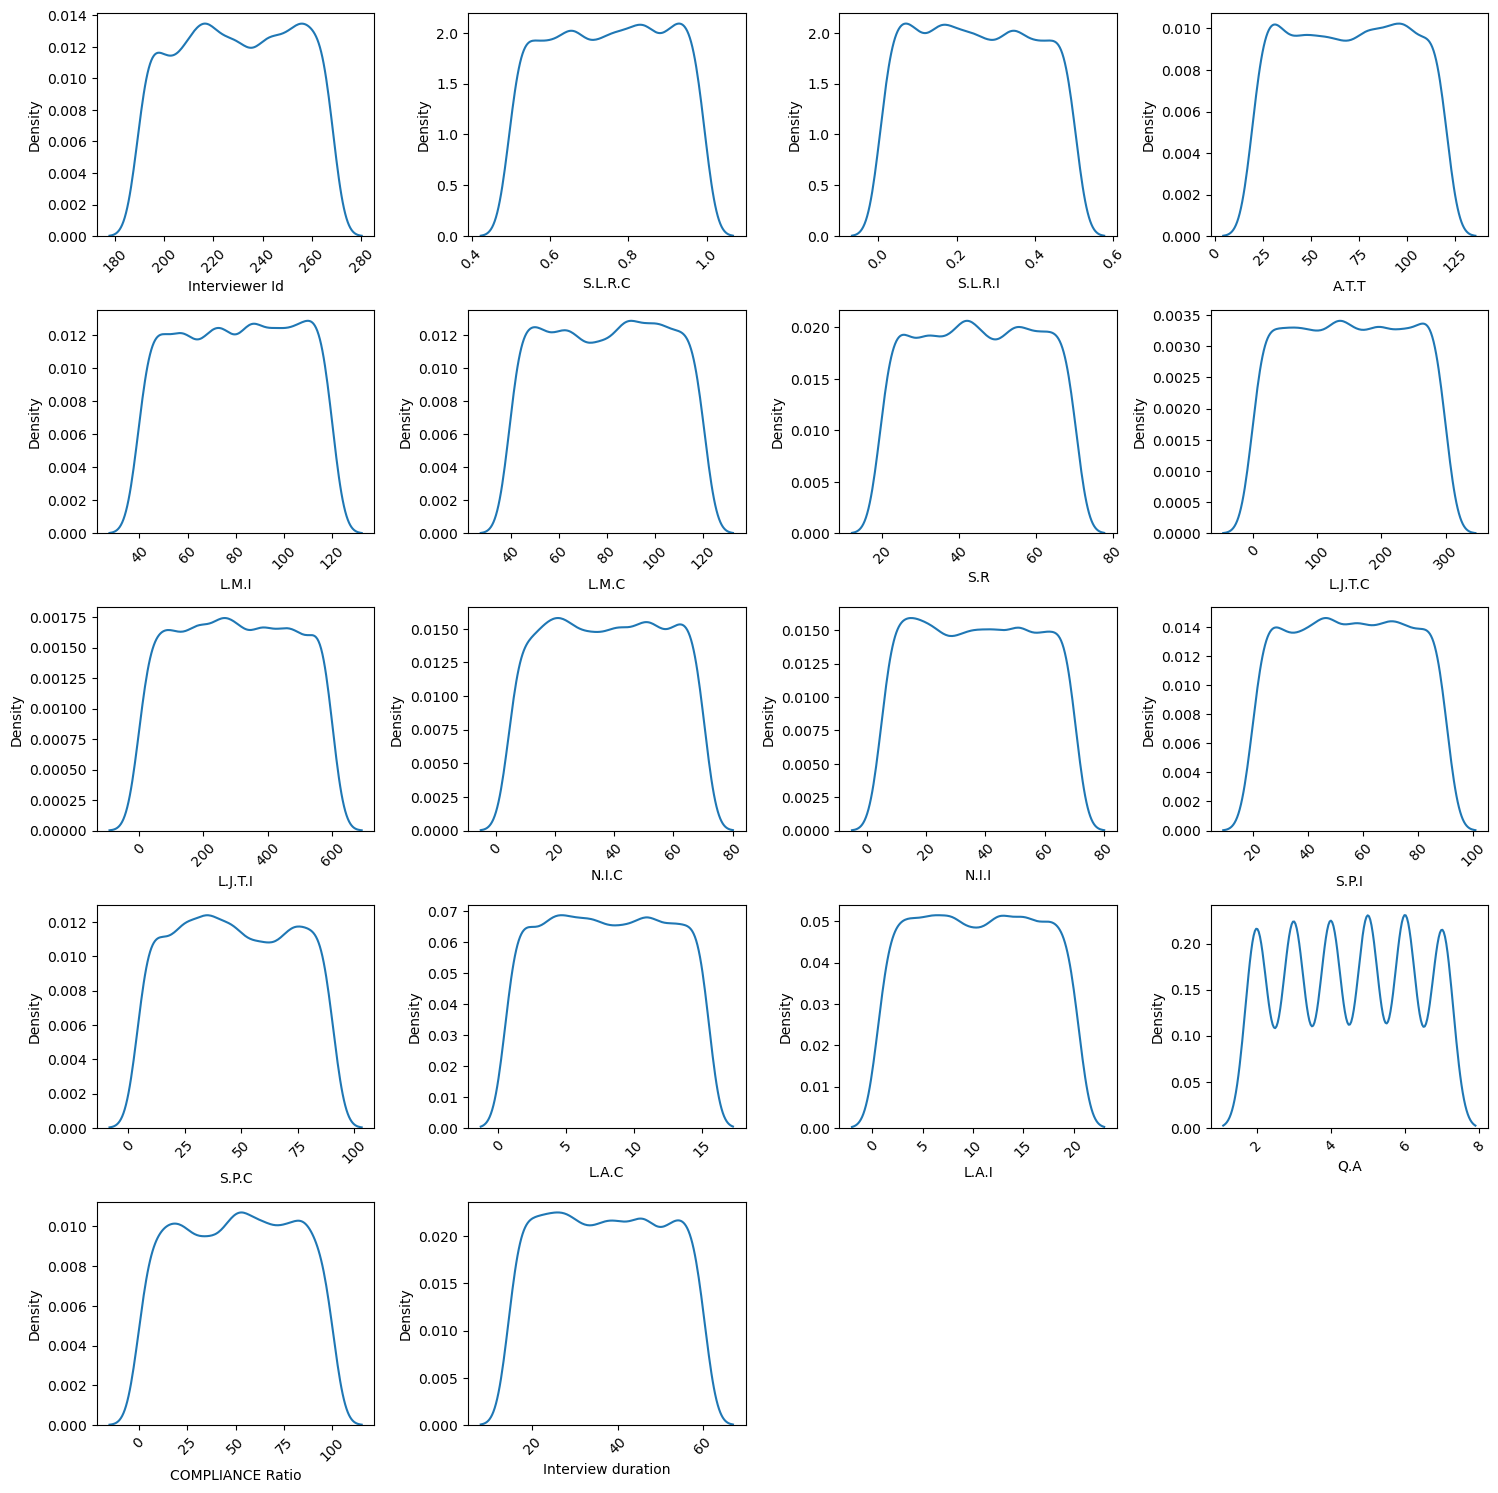

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(15,15))
axs = axs.flatten()

for i,j in enumerate(num_col):
    sns.kdeplot(data=train_df, x=j, ax=axs[i])
    axs[i].tick_params(axis='x', rotation=45)

plt.delaxes(axs[-1])
plt.delaxes(axs[-2])
plt.tight_layout()
plt.show()

#### Observations:


## Analyzing Heatmap of Numerical Features

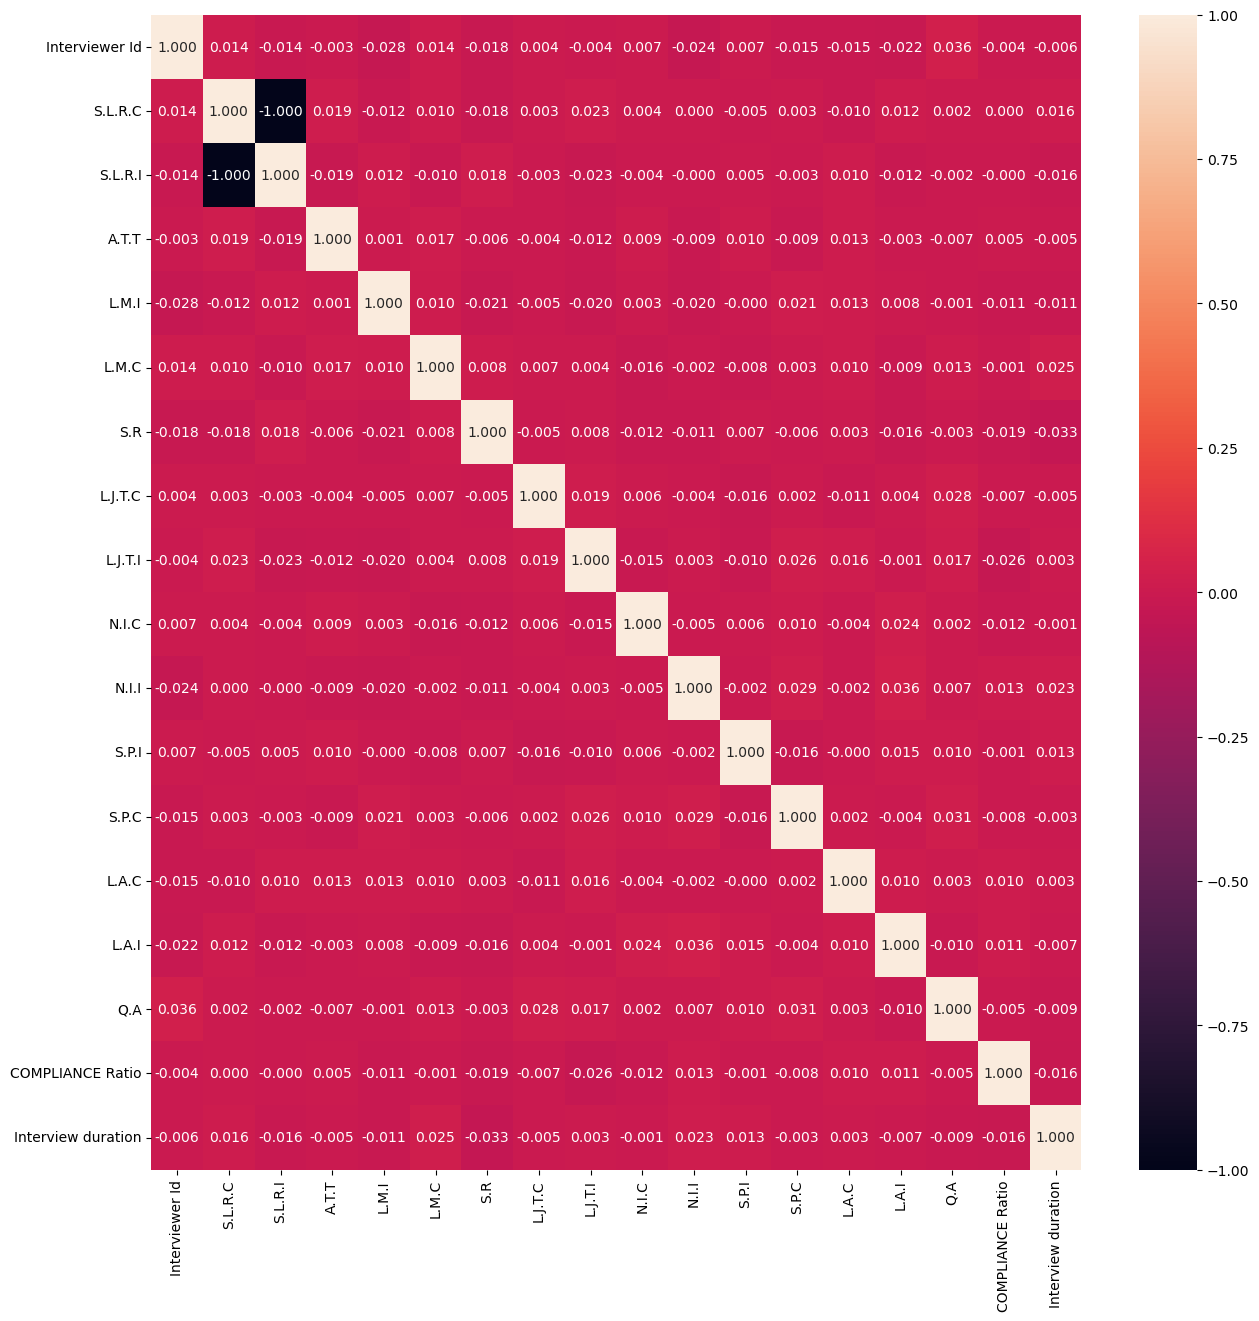

In [16]:
corr_mat = train_df[num_col].corr()

# plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, fmt='.3f')
plt.show()

#### Observations:
- None of the numerical columns show high correlation in particular, except
- SLRC and SLRI columns are perfectly inversely correlated (correlation value = -1)
- We shall drop one of these columns (SLRI)

In [17]:
# Dropping column "S.L.R.I"
train_df.drop(columns = "S.L.R.I", inplace=True)

# Preprocessing

In [18]:
# Handling Null values
train_df.isnull().sum()[train_df.isnull().sum() > 0]

P.E.I                1
P.E.C                3
Interviewer Intro    1
Opp to ask           1
dtype: int64

In [19]:
missing_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Opp to ask']

- All the above features are categorical and their missing values can be filled using the 'mode' value of the respective column.

In [20]:
# Filling missing values using Simple imputer with method = 'most_frequent'
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')

train_df[missing_cols] = pd.DataFrame(si.fit_transform(train_df[missing_cols]), index=train_df.index, columns=missing_cols)

In [21]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

# All the null values have been handled

Series([], dtype: int64)

## Splitting train_df into features and target

In [22]:
X = train_df.drop(columns = 'Status')
y = train_df['Status']

In [23]:
## Train_Test_Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (4636, 23)
Shape of X_val: (1160, 23)
Shape of y_train: (4636,)
Shape of y_val: (1160,)


### Encoding Categorical columns

In [24]:
cat_col

['Profile',
 'P.E.I',
 'P.E.C',
 'Interviewer Intro',
 'Candidate into',
 'Opp to ask']

- 'Profile' column shall be encoded using One-Hot-Encoder.
- 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask' columns shall be encoded using Ordinal Encoder

In [25]:
ord_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']

In [26]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive'], ['Negative', 'Neutral', 'Positive'], ['No','Yes'], ['No','Yes'], ['No','Yes']])
X_train[ord_cols] = pd.DataFrame(ord_enc.fit_transform(X_train[ord_cols]), columns=ord_cols, index=X_train.index)
X_val[ord_cols] = pd.DataFrame(ord_enc.transform(X_val[ord_cols]), columns=ord_cols, index=X_val.index)

In [27]:
X_train

,Interviewer Id,Profile,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
5687,200,QA Automation,0.62,100,64,62,55,218,49,51,25,27,44,9,8,2,0.0,1.0,86,38,0.0,0.0,1.0
203,218,Data Scientist,0.67,90,59,75,41,173,193,55,41,27,14,12,9,3,0.0,0.0,90,51,0.0,0.0,0.0
339,190,HR,0.75,50,104,81,46,279,156,45,26,36,8,5,18,3,2.0,0.0,86,31,1.0,0.0,1.0
838,266,Developer,0.88,27,72,84,60,0,291,8,38,31,53,4,2,7,0.0,1.0,79,56,1.0,1.0,1.0
4207,192,Program Manager,0.67,26,66,108,42,73,114,22,53,58,28,9,18,7,1.0,1.0,59,59,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,223,QA Manual,0.50,115,86,105,62,11,78,70,47,31,65,12,11,5,2.0,1.0,21,26,1.0,1.0,1.0
5194,193,Developer,0.68,53,87,72,36,213,399,62,68,75,44,2,11,6,0.0,0.0,79,40,1.0,1.0,0.0
5229,202,QA Manual,0.65,85,103,108,54,227,441,16,59,61,64,2,17,2,1.0,2.0,5,59,1.0,1.0,0.0
5393,204,Product Manager,0.94,35,55,93,60,124,507,31,24,43,48,10,8,5,1.0,2.0,52,44,1.0,1.0,0.0


In [28]:
# One-Hot-Encoding the Profile columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[['Profile']]), index=X_train.index, columns = sorted(X_train['Profile'].unique()))
temp_X_val = pd.DataFrame(ohe.transform(X_val[['Profile']]), index=X_val.index, columns = sorted(X_val['Profile'].unique()))

# Concatting the one-hot-encoded columns with their respective dataframes
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_val = pd.concat([X_val, temp_X_val], axis=1)

# Dropping the Profile column
X_train.drop(columns = 'Profile', inplace = True)
X_val.drop(columns = 'Profile', inplace = True)

In [29]:
# Encoding target column using replace method
y_train.replace({'Not Consider':0, 'May Consider':1, 'Consider':2}, inplace=True)
y_val.replace({'Not Consider':0, 'May Consider':1, 'Consider':2}, inplace=True)

### Feature Scaling using MinMaxScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(mms.fit_transform(X_val), columns=X_val.columns, index=X_val.index)

- Our Data is now prepared to pass into ML algorithms

# Applying ML Algorithms

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# Creating a Dataframe to showcase train and val accuracy of various models
result = pd.DataFrame(columns = ["Model_name", "Accuracy_train", "Accuracy_val"])

## 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Defining Logistic Regression and fitting to the train data
lr = LogisticRegression(max_iter=120, random_state=42)
lr.fit(X_train_scaled, y_train)

# Taking predictions on val data
y_pred_val = lr.predict(X_val_scaled)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr.score(X_train_scaled, y_train)}")
print(f"Accuracy on val_data: {lr.score(X_val_scaled, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

# Storing the result in result dataframe
temp_result = pd.DataFrame({'Model_name': 'Logistic Regression', 'Accuracy_train': lr.score(X_train_scaled, y_train), 'Accuracy_val': lr.score(X_val_scaled, y_val)}, index = [1])
result = pd.concat([result, temp_result])

Accuracy on Train_data: 0.9870578084555651
Accuracy on val_data: 0.9836206896551725
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       302
           1       0.97      0.98      0.98       389
           2       0.99      0.99      0.99       469

    accuracy                           0.98      1160
   macro avg       0.98      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



In [75]:
# Defining Logistic Regression and fitting to the unscaled train data
lr2 = LogisticRegression(max_iter=250, random_state=42, penalty=None, solver='newton-cg')
lr2.fit(X_train, y_train)

# Taking predictions on val data
y_pred_val = lr2.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr2.score(X_train, y_train)}")
print(f"Accuracy on val_data: {lr2.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 1.0
Accuracy on val_data: 0.993103448275862
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       302
           1       1.00      0.98      0.99       389
           2       0.99      1.00      1.00       469

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



## 2. Decision Tree Classifier 

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Defining DecisionTreeClassifier and fitting to the train data
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Taking predictions on val data
y_pred_val = dtree.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {dtree.score(X_train, y_train)}")
print(f"Accuracy on val_data: {dtree.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 1.0
Accuracy on val_data: 0.868103448275862
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       302
           1       0.81      0.80      0.80       389
           2       0.90      0.92      0.91       469

    accuracy                           0.87      1160
   macro avg       0.87      0.86      0.87      1160
weighted avg       0.87      0.87      0.87      1160



## 3. RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_val = rfc.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {rfc.score(X_train, y_train)}")
print(f"Accuracy on val_data: {rfc.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 1.0
Accuracy on val_data: 0.8870689655172413
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       302
           1       0.82      0.85      0.83       389
           2       0.92      0.93      0.92       469

    accuracy                           0.89      1160
   macro avg       0.89      0.88      0.89      1160
weighted avg       0.89      0.89      0.89      1160



In [37]:
pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:10]

L.J.T.C               0.465974
S.P.C                 0.058053
L.M.C                 0.053242
N.I.C                 0.043696
Interview duration    0.034584
L.J.T.I               0.028619
COMPLIANCE Ratio      0.027956
L.M.I                 0.026932
S.P.I                 0.025609
Interviewer Id        0.025567
dtype: float64

In [38]:
# Optimizing RandomForestClassifier hyperparameters using GridSearchCV
param_dict = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [x for x in range(5,12)],
    'max_features' : ['sqrt', 'log2'],
    'min_samples_leaf' : [x for x in range(1,6)],
}

from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(estimator = rfc, param_grid = param_dict, cv=3, n_jobs=-1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [39]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [40]:
y_pred_val = gscv.predict(X_val)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {gscv.score(X_train, y_train)}")
print(f"Accuracy on val_data: {gscv.score(X_val, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9984900776531492
Accuracy on val_data: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       302
           1       0.87      0.79      0.83       389
           2       0.90      0.95      0.92       469

    accuracy                           0.89      1160
   macro avg       0.89      0.89      0.89      1160
weighted avg       0.89      0.89      0.89      1160



# Selecting Best Features Using Different Techniques

### 1. SelectKBest method

In [41]:
# Using chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select = SelectKBest(chi2, k=5)
z = select.fit_transform(X_train_scaled, y_train)

features = np.array(X_train_scaled.columns)
filter = select.get_support()
features[filter]

array(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration'],
      dtype=object)

In [42]:
# Using f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

select = SelectKBest(f_classif, k=5)
z = select.fit_transform(X_train_scaled, y_train)

features = np.array(X_train_scaled.columns)
filter = select.get_support()
features[filter]

array(['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration'],
      dtype=object)

### 2. Using RFE (Recursive Feature Elimination)

In [43]:
from sklearn.feature_selection import RFECV

select = RFECV(estimator=lr, min_features_to_select=5, cv=5)
select = select.fit(X_train_scaled, y_train)

mask = select.get_support()
features = np.array(X_train_scaled.columns)
# print(select.ranking_)
# print(features)
print(features[mask])

['L.M.C' 'L.J.T.C' 'N.I.C' 'S.P.C' 'L.A.C' 'Interview duration']


In [44]:
X_train_scaled

,Interviewer Id,S.L.R.C,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Account Manager,Data Scientist,Developer,HR,Marketing,Product Manager,Program Manager,QA Automation,QA Manual,Sales
5687,0.128205,0.244898,0.80,0.3000,0.2750,0.70,0.726667,0.081667,0.707692,0.307692,0.100000,0.458824,0.571429,0.368421,0.0,0.0,0.5,0.86,0.511111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.358974,0.346939,0.70,0.2375,0.4375,0.42,0.576667,0.321667,0.769231,0.553846,0.100000,0.105882,0.785714,0.421053,0.2,0.0,0.0,0.90,0.800000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.000000,0.510204,0.30,0.8000,0.5125,0.52,0.930000,0.260000,0.615385,0.323077,0.228571,0.035294,0.285714,0.894737,0.2,1.0,0.0,0.86,0.355556,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
838,0.974359,0.775510,0.07,0.4000,0.5500,0.80,0.000000,0.485000,0.046154,0.507692,0.157143,0.564706,0.214286,0.052632,1.0,0.0,0.5,0.79,0.911111,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,0.025641,0.346939,0.06,0.3250,0.8500,0.44,0.243333,0.190000,0.261538,0.738462,0.542857,0.270588,0.571429,0.894737,1.0,0.5,0.5,0.59,0.977778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.423077,0.000000,0.95,0.5750,0.8125,0.84,0.036667,0.130000,1.000000,0.646154,0.157143,0.705882,0.785714,0.526316,0.6,1.0,0.5,0.21,0.244444,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5194,0.038462,0.367347,0.33,0.5875,0.4000,0.32,0.710000,0.665000,0.876923,0.969231,0.785714,0.458824,0.071429,0.526316,0.8,0.0,0.0,0.79,0.555556,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,0.153846,0.306122,0.65,0.7875,0.8500,0.68,0.756667,0.735000,0.169231,0.830769,0.585714,0.694118,0.071429,0.842105,0.0,0.5,1.0,0.05,0.977778,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5393,0.179487,0.897959,0.15,0.1875,0.6625,0.80,0.413333,0.845000,0.400000,0.292308,0.328571,0.505882,0.642857,0.368421,0.6,0.5,1.0,0.52,0.644444,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
# Taking only important columns and fitting Logistic Regression model again
imp_cols = ['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration']

lr_1 = LogisticRegression(random_state = 42)
lr_1.fit(X_train_scaled.loc[:,imp_cols], y_train)

# Taking predictions on val data
y_pred_val = lr_1.predict(X_val_scaled.loc[:,imp_cols])

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr_1.score(X_train_scaled.loc[:,imp_cols], y_train)}")
print(f"Accuracy on val_data: {lr_1.score(X_val_scaled.loc[:,imp_cols], y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9950388265746333
Accuracy on val_data: 0.993103448275862
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       302
           1       0.99      0.98      0.99       389
           2       0.99      1.00      0.99       469

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



In [46]:
# Taking only important columns and fitting Logistic Regression model on unscaled data  (BEST-YET)
imp_cols = ['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration']

lr_2 = LogisticRegression(max_iter=1500, random_state = 42)
lr_2.fit(X_train.loc[:,imp_cols], y_train)

# Taking predictions on val data
y_pred_val = lr_2.predict(X_val.loc[:,imp_cols])

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr_2.score(X_train.loc[:,imp_cols], y_train)}")
print(f"Accuracy on val_data: {lr_2.score(X_val.loc[:,imp_cols], y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 1.0
Accuracy on val_data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       389
           2       1.00      1.00      1.00       469

    accuracy                           1.00      1160
   macro avg       1.00      1.00      1.00      1160
weighted avg       1.00      1.00      1.00      1160



## 4. SVC

In [47]:
from sklearn.svm import SVC

# Defining SVC and fitting to the train data
svc = SVC(random_state=42, kernel = 'linear')
svc.fit(X_train_scaled, y_train)

# Taking predictions on val data
y_pred_val = svc.predict(X_val_scaled)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {svc.score(X_train_scaled, y_train)}")
print(f"Accuracy on val_data: {svc.score(X_val_scaled, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9857635893011216
Accuracy on val_data: 0.9758620689655172
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       302
           1       0.97      0.96      0.96       389
           2       0.99      0.99      0.99       469

    accuracy                           0.98      1160
   macro avg       0.97      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



In [48]:
# Defining SVC and fitting to the imp_cols of train data
svc = SVC(random_state=42, kernel = 'linear')
svc.fit(X_train_scaled.loc[:,imp_cols], y_train)

# Taking predictions on val data
y_pred_val = svc.predict(X_val_scaled.loc[:,imp_cols])

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {svc.score(X_train_scaled.loc[:,imp_cols], y_train)}")
print(f"Accuracy on val_data: {svc.score(X_val_scaled.loc[:,imp_cols], y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.9943917169974116
Accuracy on val_data: 0.9922413793103448
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       302
           1       0.99      0.98      0.99       389
           2       0.99      1.00      0.99       469

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



## Applying PCA on train data

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(X_train)

# Number of components generated that explain 95% variance
print(f"Number of components that explain 95% variance: {pca.n_components_}")

# Amount of variance explained by the above components
print(f"Variance Explained by the above features: {pca.explained_variance_ratio_}")

Number of components that explain 95% variance: 7
Variance Explained by the above features: [0.69379663 0.17801333 0.02029624 0.01909559 0.01444705 0.01286443
 0.01275309]


In [50]:
X_train_pca = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
X_val_pca = pd.DataFrame(pca.transform(X_val), index=X_val.index, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [51]:
# Defining Logistic Regression and fitting to the PCA train and val data
lr_pca = LogisticRegression(max_iter=2000, random_state=42)
lr_pca.fit(X_train_pca, y_train)

# Taking predictions on val data
y_pred_val = lr_pca.predict(X_val_pca)

# Checking Accuracy on train and val data
print(f"Accuracy on Train_data: {lr_pca.score(X_train_pca, y_train)}")
print(f"Accuracy on val_data: {lr_pca.score(X_val_pca, y_val)}")

# Classification Report on val data
print(classification_report(y_val, y_pred_val))

Accuracy on Train_data: 0.8688524590163934
Accuracy on val_data: 0.8810344827586207
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       302
           1       0.81      0.84      0.82       389
           2       0.94      0.91      0.93       469

    accuracy                           0.88      1160
   macro avg       0.88      0.88      0.88      1160
weighted avg       0.88      0.88      0.88      1160



<hr>

# Cleaning and Preparing Test Data for predictions

In [52]:
test_df = pd.read_csv('test_IA_-_test.csv')
test_df.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes


In [53]:
# Dropping irrelevant columns and saving the dataframe as df_test
drop_cols = ['Interview Id', 'Candidate Id', 'S.L.R.I']
df_test = test_df.drop(columns = drop_cols)

In [54]:
# Checking Null values
df_test.isnull().sum()[df_test.isnull().sum() > 0]

L.J.T.C              1
S.P.I                2
L.A.I                1
Q.A                  1
P.E.I                2
P.E.C                2
COMPLIANCE Ratio     1
Interviewer Intro    2
dtype: int64

In [55]:
# Defining how the missing values shall be handled in columns with null values
mean_cols = ['L.J.T.C', 'S.P.I', 'L.A.I', 'COMPLIANCE Ratio']
mode_cols = ['Q.A', 'P.E.I', 'P.E.C', 'Interviewer Intro']

In [56]:
# Filling missing values in mean_cols using mean values
from sklearn.impute import SimpleImputer
si_mean = SimpleImputer(strategy='mean')
df_test[mean_cols] = pd.DataFrame(si_mean.fit_transform(df_test[mean_cols]), index=df_test.index, columns=mean_cols)

In [57]:
# Filling missing values in mode_cols using mode values
si_mode = SimpleImputer(strategy = 'most_frequent')
df_test[mode_cols] = pd.DataFrame(si_mode.fit_transform(df_test[mode_cols]), index=df_test.index, columns=mode_cols)

In [58]:
# Checking Null values again
df_test.isnull().sum()[df_test.isnull().sum() > 0]

# All the null values in df_test have been handled

Series([], dtype: int64)

### Encoding Categorical columns

In [59]:
ord_cols = ['P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into', 'Opp to ask']
ohe_cols = 'Profile'

In [60]:
# encoding ord_cols using Ordinal Encoder
ord_enc = OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive'], ['Negative', 'Neutral', 'Positive'], ['No','Yes'], ['No','Yes'], ['No','Yes']])
df_test[ord_cols] = pd.DataFrame(ord_enc.fit_transform(df_test[ord_cols]), columns=ord_cols, index=df_test.index)

In [61]:
# Encoding Profile column using One-hot-Encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

temp_df_test = pd.DataFrame(ohe.fit_transform(df_test[['Profile']]), index=df_test.index, columns=sorted(df_test['Profile'].unique()))
df_test = pd.concat([df_test, temp_df_test], axis=1)
df_test.drop(columns = 'Profile', inplace = True)

In [62]:
# Scaling df_test using MinMaxScaler
mms = MinMaxScaler()
df_test_scaled = pd.DataFrame(mms.fit_transform(df_test), index=df_test.index, columns=df_test.columns)

- Our test data is ready to pass into ML algorithms

In [63]:
# Consiering only imp_columns
imp_cols = ['L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'L.A.C', 'Interview duration']
df_test_scaled_imp = df_test_scaled.loc[:, imp_cols]

In [64]:
# Applying PCA on test_data
df_test_pca = pd.DataFrame(pca.transform(df_test), index=df_test.index, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Taking Predictions on df_test

In [76]:
## 1. Using Logistic regression model
predictions = lr_2.predict(df_test.loc[:,imp_cols])
y_pred_test = pd.Series(predictions, index=df_test.index, name='Status')

### Encoding y_pred_test back to original format and preparing submission file

In [77]:
y_pred_test.replace({0:'Not Consider', 1:'May Consider', 2:'Consider'}, inplace = True)

In [78]:
y_pred_test.value_counts()

Status
Consider        489
May Consider    401
Not Consider    310
Name: count, dtype: int64

In [79]:
submission = pd.concat([test_df['Interview Id'], y_pred_test], axis=1)
submission

,Interview Id,Status
0,702127796635,Consider
1,613490569071,May Consider
2,759998772623,May Consider
3,391760082113,Not Consider
4,941599210196,Not Consider
...,...,...
1195,256033687434,Not Consider
1196,627337316047,Consider
1197,75547031851,Not Consider
1198,173914777164,May Consider


In [80]:
# Saving submission dataframe to a csv file
submission.to_csv('submission6.csv', index=False)